In [2]:
!pip install ucimlrepo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025010 entries, 0 to 1025009
Data columns (total 11 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   S1      1025010 non-null  int64
 1   C1      1025010 non-null  int64
 2   S2      1025010 non-null  int64
 3   C2      1025010 non-null  int64
 4   S3      1025010 non-null  int64
 5   C3      1025010 non-null  int64
 6   S4      1025010 non-null  int64
 7   C4      1025010 non-null  int64
 8   S5      1025010 non-null  int64
 9   C5      1025010 non-null  int64
 10  CLASS   1025010 non-null  int64
dtypes: int64(11)
memory usage: 86.0 MB
None
--------------------------------------------------
S1       0
C1       0
S2       0
C2       0
S3       0
C3       0
S4       0
C4       0
S5       0
C5       0
CLASS    0
dtype: int64
--------------------------------------------------
CLASS
0    513702
1    433097
2     48828
3     21634
4      3978
5      2050
6      1460
7       236
8        17
9         8

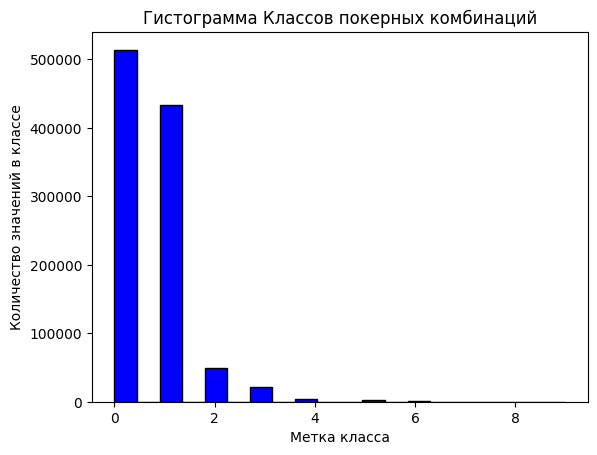

In [4]:
### Датасет - рука в покере
### Работа с полным набором
### Обработка категориальных данных
import pandas as pd
from ucimlrepo import fetch_ucirepo

def data_load():
        ### Получить набор данных
    poker_hand = fetch_ucirepo(id=158)
    return(poker_hand)

def data_read(file):
        ### Загрузка данных
    data = pd.read_csv('data.csv', delimiter = ',')
    return(data)

########################################################

i = 0
if i == 0:
      ### Загрузка данных из библиотеки ucimlrepo
  poker_hand = data_load()
      ### Преобразование Данных в датафрейм
  x = poker_hand.data.features
  y = poker_hand.data.targets
      ### объединение двых датафреймов в один
  data = pd.merge(x, y, left_index=True, right_index=True)
else:
      ### Загрузка данных из библиотеки ucimlrepo
  data = data_read('data.svc')

print('='*50)
print(data.info())
print('-'*50)

### Как мы видим датасет содержит 1,025,010 записе
### Поиск нулевых значений в датасет
print(data.isnull().sum())
print('-'*50)

### считаем уникальные значени для целевого признака
print(data['CLASS'].value_counts())
print('='*50)

### Как мы видим существует серьезный дисболанс в классах
### Построим гистограмму, она даст наглядное представление о дисбалансе
import matplotlib.pyplot as plt

#plt.style.use('fivethirtyeight')
plt.hist(data['CLASS'].dropna(), bins = 20, color = 'blue', edgecolor = 'black');
plt.xlabel('Метка класса'); plt.ylabel('Количество значений в классе');
plt.title('Гистограмма Классов покерных комбинаций');

### Несмотря на то, что масти карт ('Sx') представлены целыми числами,
### это категориальные данные,
### поскольку они принимают только фиксированное количество значений
### без какого-либо порядка между ними

### сначала разделим наши данные на входы и выходы
import numpy as np

X = data.drop('CLASS', axis = 1)
print(X.info())
print('-'*50)
### обработка категориальных данных
X_dum = pd.get_dummies(X, columns = ['S1', 'S2', 'S3', 'S4', 'S5'])
print(X_dum.info())
print('='*50)
y_dum = data.CLASS
print(y_dum.info())
print('='*50)

### Разбиваем датасеты для тестирования и валидации
### разделяем весь набор данных один раз для выделения обучающей выборки

from sklearn.model_selection import train_test_split

X_dum_train, X_dum_test, y_train, y_test = train_test_split(X_dum, y_dum,
                                                            train_size=0.7,
                                                            random_state=42,
                                                            stratify=y_dum)
print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")
print('-'*50)

### разделяем оставшиеся данные на датасеты для обучения и валидации.
X2_dum_train, X_dum_val, y2_train, y_val = train_test_split(X_dum_train, y_train,
                                                            train_size=0.5,
                                                            random_state=42,
                                                            stratify=y_train)
print(f"Количество строк в y_train по классам: {np.bincount(y2_train)}")
print(f"Количество строк в y_val по классам: {np.bincount(y_val)}")
print('='*50)


In [5]:
### В первой модели использовал одну из наиболее эффективных
### древовидных моделей: XGBoost
import xgboost as xgb

model = xgb.XGBClassifier(n_estimators = 4000, early_stopping_rounds = 50)
model.fit(X2_dum_train, y2_train,
          eval_set = [(X2_dum_train, y2_train), (X_dum_val, y_val)],
          verbose = 100)
prediction = model.predict(X_dum_val)

print(np.mean(prediction==y_val))
print('-'*50)

final_prediction = model.predict(X_dum_test)

print(np.mean(y_test == final_prediction))
print('='*50)

[0]	validation_0-mlogloss:1.77029	validation_1-mlogloss:1.77037
[100]	validation_0-mlogloss:0.57877	validation_1-mlogloss:0.59808
[200]	validation_0-mlogloss:0.39533	validation_1-mlogloss:0.42605
[300]	validation_0-mlogloss:0.28635	validation_1-mlogloss:0.32353
[400]	validation_0-mlogloss:0.21151	validation_1-mlogloss:0.25225
[500]	validation_0-mlogloss:0.15364	validation_1-mlogloss:0.19630
[600]	validation_0-mlogloss:0.11229	validation_1-mlogloss:0.15558
[700]	validation_0-mlogloss:0.08359	validation_1-mlogloss:0.12726
[800]	validation_0-mlogloss:0.06605	validation_1-mlogloss:0.11013
[900]	validation_0-mlogloss:0.04903	validation_1-mlogloss:0.09234
[1000]	validation_0-mlogloss:0.03761	validation_1-mlogloss:0.08055
[1100]	validation_0-mlogloss:0.02970	validation_1-mlogloss:0.07239
[1200]	validation_0-mlogloss:0.02200	validation_1-mlogloss:0.06371
[1300]	validation_0-mlogloss:0.01716	validation_1-mlogloss:0.05835
[1400]	validation_0-mlogloss:0.01376	validation_1-mlogloss:0.05477
[1500]	

In [6]:
from sklearn. metrics import classification_report
report = classification_report(y_test, final_prediction)
print(report)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, final_prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    154111
           1       1.00      1.00      1.00    129929
           2       0.97      0.99      0.98     14649
           3       0.98      0.97      0.97      6490
           4       0.62      0.19      0.29      1193
           5       0.99      1.00      0.99       615
           6       0.25      0.08      0.12       438
           7       0.00      0.00      0.00        71
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         2

    accuracy                           0.99    307503
   macro avg       0.58      0.52      0.53    307503
weighted avg       0.99      0.99      0.99    307503



array([[154111,      0,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0, 129758,      0,      0,    139,      0,      8,     24,
             0,      0],
       [     0,     43,  14548,      0,      0,      0,     32,     26,
             0,      0],
       [     0,      0,     97,   6301,      0,      0,     61,     31,
             0,      0],
       [   817,    150,      0,      0,    226,      0,      0,      0,
             0,      0],
       [     2,      0,      0,      0,      0,    613,      0,      0,
             0,      0],
       [     0,      0,    315,     89,      0,      0,     33,      1,
             0,      0],
       [     0,      0,      0,     71,      0,      0,      0,      0,
             0,      0],
       [     0,      0,      0,      0,      0,      5,      0,      0,
             0,      0],
       [     0,      0,      0,      0,      0,      2,      0,      0,
             0,      0]])

In [ ]:
#Несколько моделей на полных данных (считается 3 часа)
import pandas as pd
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
#from skl2onnx import convert_sklearn
#from skl2onnx.common.data_types import FloatTensorType
#import onnxruntime as ort
import numpy as np
from sys import argv

# создаем молель SVC Classifier с линейным ядром
svc_model = SVC(kernel='linear', C=1.0)

svc_model.fit(X_dum_train, y_train)
y_pred = svc_model.predict(X_dum_test)

# оцениваем точность модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVC Classifier model:", accuracy)

print("\nПолный отчет классификации:\n", classification_report(y_test, y_pred))
